# Regression in PyTorch

In [1]:
import matplotlib.pyplot as plt # for plots
import numpy as np # for generating data and working with tensors
import pandas as pd # pandas for reading in the csv data and visualizing it
import torch # PyTorch for building and training the network
import torch.nn as nn # for building the model architecture
import torch.optim as optim # for getting an optimizer to update the network weights
from sklearn.model_selection import train_test_split # for splitting the dataset into train and test sets

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Simple Linear Regression

### Generating the data

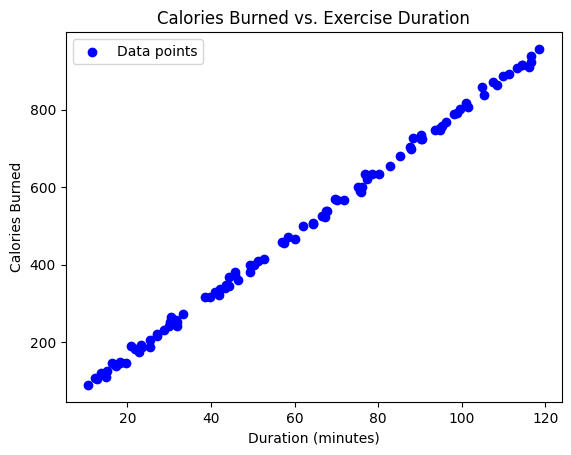

,Duration (minutes),Calories Burned
0,51.199413,410.465775
1,114.578574,913.638516
2,90.519334,725.072277
3,75.852433,586.943777
4,27.162050,215.099685


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 100  # Number of data points
duration = np.random.uniform(10, 120, num_samples)  # Duration between 10 to 120 minutes

# Define calories burned with a linear relationship and some noise
calories_burned = duration * 8 + np.random.normal(0, 10, num_samples)  # Noise with std deviation of 10

# Create a DataFrame to store the dataset
data = pd.DataFrame({
    'Duration (minutes)': duration,
    'Calories Burned': calories_burned
})

# Plot the synthetic data
plt.scatter(data['Duration (minutes)'], data['Calories Burned'], color='b', label='Data points')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs. Exercise Duration')
plt.legend()
plt.show()
data.head()

### Building the model

In [3]:
# create the structure of the PyTorch model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input (duration), one output (calories)

    def forward(self, x):
        return self.linear(x)

# Define and initialize the model
model = LinearRegressionModel()
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Training the model

Epoch [100/1000], Loss: 0.6605
Epoch [200/1000], Loss: 0.4443
Epoch [300/1000], Loss: 0.2989
Epoch [400/1000], Loss: 0.2013
Epoch [500/1000], Loss: 0.1356
Epoch [600/1000], Loss: 0.0915
Epoch [700/1000], Loss: 0.0619
Epoch [800/1000], Loss: 0.0420
Epoch [900/1000], Loss: 0.0286
Epoch [1000/1000], Loss: 0.0196


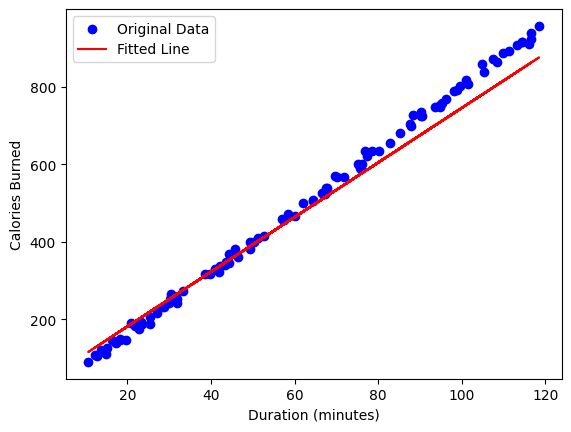

In [4]:
# Convert data to PyTorch tensors
X = torch.tensor(data['Duration (minutes)'], dtype=torch.float32).view(-1, 1)
y = torch.tensor(data['Calories Burned'], dtype=torch.float32).view(-1, 1)

# Normalize the tensors
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
X = (X - X_mean) / X_std
y = (y - y_mean) / y_std


# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
model.train()
for epoch in range(num_epochs):
    predictions = model(X)
    loss = criterion(predictions, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Convert the mean and std tensors to numpy for scaling
y_std = y_std.item()
y_mean = y_mean.item()

# Unnormalize the predictions
predicted = model(X).detach().numpy() * y_std + y_mean

# Plot the results using original data
plt.scatter(data['Duration (minutes)'], data['Calories Burned'], color='blue', label='Original Data')
plt.plot(data['Duration (minutes)'], predicted, color='red', label='Fitted Line')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

Epoch [100/10000], Loss: 0.0133
Epoch [200/10000], Loss: 0.0095
Epoch [300/10000], Loss: 0.0068
Epoch [400/10000], Loss: 0.0051
Epoch [500/10000], Loss: 0.0038
Epoch [600/10000], Loss: 0.0030
Epoch [700/10000], Loss: 0.0024
Epoch [800/10000], Loss: 0.0021
Epoch [900/10000], Loss: 0.0018
Epoch [1000/10000], Loss: 0.0016
Epoch [1100/10000], Loss: 0.0015
Epoch [1200/10000], Loss: 0.0014
Epoch [1300/10000], Loss: 0.0014
Epoch [1400/10000], Loss: 0.0013
Epoch [1500/10000], Loss: 0.0013
Epoch [1600/10000], Loss: 0.0013
Epoch [1700/10000], Loss: 0.0013
Epoch [1800/10000], Loss: 0.0013
Epoch [1900/10000], Loss: 0.0013
Epoch [2000/10000], Loss: 0.0013
Epoch [2100/10000], Loss: 0.0013
Epoch [2200/10000], Loss: 0.0013
Epoch [2300/10000], Loss: 0.0013
Epoch [2400/10000], Loss: 0.0013
Epoch [2500/10000], Loss: 0.0012
Epoch [2600/10000], Loss: 0.0012
Epoch [2700/10000], Loss: 0.0012
Epoch [2800/10000], Loss: 0.0012
Epoch [2900/10000], Loss: 0.0012
Epoch [3000/10000], Loss: 0.0012
Epoch [3100/10000],

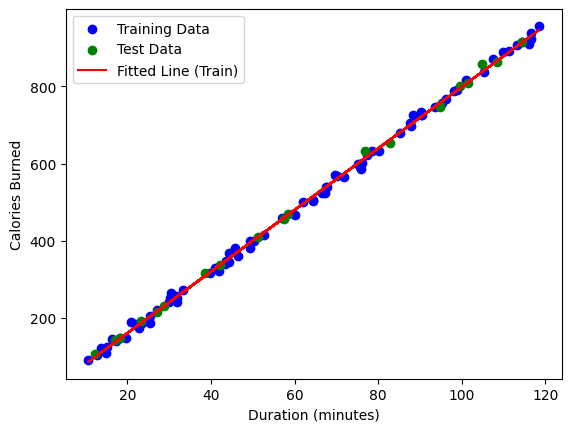

In [5]:
# Convert data to PyTorch tensors
X = torch.tensor(data['Duration (minutes)'], dtype=torch.float32).view(-1, 1)
y = torch.tensor(data['Calories Burned'], dtype=torch.float32).view(-1, 1)

# Normalize the tensors
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
X = (X - X_mean) / X_std
y = (y - y_mean) / y_std

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10000
model.train()
for epoch in range(num_epochs):
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate on the test set
model.eval()
with torch.no_grad():
    predictions_train = model(X_train).detach().numpy() * y_std.item() + y_mean.item()
    predictions_test = model(X_test).detach().numpy() * y_std.item() + y_mean.item()

# Unnormalize test and training points for plotting
X_train_unnorm = X_train * X_std + X_mean
y_train_unnorm = y_train * y_std + y_mean
X_test_unnorm = X_test * X_std + X_mean
y_test_unnorm = y_test * y_std + y_mean

# Plot the results
plt.scatter(X_train_unnorm.numpy(), y_train_unnorm.numpy(), color='blue', label='Training Data')
plt.scatter(X_test_unnorm.numpy(), y_test_unnorm.numpy(), color='green', label='Test Data')
plt.plot(X_train_unnorm.numpy(), predictions_train, color='red', label='Fitted Line (Train)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

## Multi Regression - Nutrients Data

### Reading in the data

In [6]:
# read in the data
nutrients_dataframe = pd.read_csv('../Data/nutrients.csv')
# print first 5 rows
nutrients_dataframe.head(5)

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


### Preparing the data as input

We are training a neural network to predict the energy of a food (basically calories) based on the other contents of the food. We don't want to use the food name since that would not be helpful for predicting the energy of food that is not in our dataset.

In [7]:
# train_data_input, train_data_
X = nutrients_dataframe[['Protein', 'Fat', 'Calcium', 'Iron']].values
y = nutrients_dataframe[['Energy']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_split = X_test
y_test_split = y_test

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

### Defining the model architecture

In [8]:
class MultiRegressionModel(nn.Module):
	def __init__(self):
		super(MultiRegressionModel, self).__init__()
		# define fully connected layers
		self.fc1 = nn.Linear(4, 1) # 4 input features -> 2 neurons
	
	def forward(self, x):
		x = self.fc1(x)
		return x
model = MultiRegressionModel()

### Training the model

In [9]:
def train_model(model):
	# Choose mean squared error as the loss function
	criterion = nn.MSELoss()

	# Choose Adam to optimize the neural net weights
	optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

	# Training loop
	EPOCHS = 1000
	for epoch in range(EPOCHS):
		model.train()
		optimizer.zero_grad()
		predictions = model(X_train)
		loss = criterion(predictions, y_train)
		loss.backward()
		optimizer.step()

		if (epoch + 1) % 100 == 0:
			print(f'Epoch [{epoch + 1}/{EPOCHS}], Loss: {loss.item():.4f}')
train_model(model)

Epoch [100/1000], Loss: 29391.7715
Epoch [200/1000], Loss: 20914.9375
Epoch [300/1000], Loss: 14469.9287
Epoch [400/1000], Loss: 9750.9336
Epoch [500/1000], Loss: 6442.8257
Epoch [600/1000], Loss: 4218.4546
Epoch [700/1000], Loss: 2781.8467
Epoch [800/1000], Loss: 1886.6023
Epoch [900/1000], Loss: 1342.2872
Epoch [1000/1000], Loss: 1012.3521


### Check predictions compared to actual for the whole dataset

In [10]:
# Predicting using the trained model on the entire dataset (X)
model.eval()
with torch.no_grad():
    all_predictions = model(torch.tensor(X, dtype=torch.float32)).numpy()

# Append predictions to the dataframe as a new column
nutrients_dataframe['Model 1 Predicted Energy'] = all_predictions

# Print the updated dataframe with predictions
nutrients_dataframe.head()

,Name,Energy,Protein,Fat,Calcium,Iron,Model 1 Predicted Energy
0,Braised beef,340,20,28,9,2.6,295.060181
1,Hamburger,245,21,17,9,2.7,230.940277
2,Roast beef,420,15,39,7,2.0,336.671844
3,Beefsteak,375,19,32,9,2.6,315.351654
4,Canned beef,180,22,10,17,3.7,196.230301


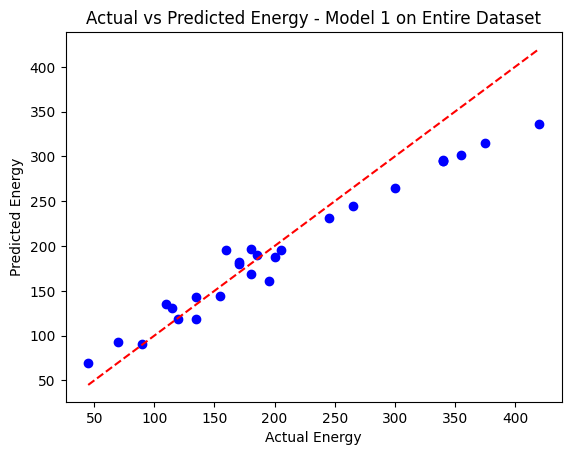

In [11]:
# Determine the min and max of both actual and predicted energies
actual_min = min(nutrients_dataframe['Energy'])
actual_max = max(nutrients_dataframe['Energy'])
predicted_min = min(nutrients_dataframe['Model 1 Predicted Energy'])
predicted_max = max(nutrients_dataframe['Model 1 Predicted Energy'])

# Use the bounds of both actual and predicted energies for the line of perfect prediction
plt.plot([min(actual_min, predicted_min), max(actual_max, predicted_max)],
         [min(actual_min, predicted_min), max(actual_max, predicted_max)],
         color='red', linestyle='--')

# Plot actual vs predicted values
plt.scatter(nutrients_dataframe['Energy'], nutrients_dataframe['Model 1 Predicted Energy'], color='blue')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title('Actual vs Predicted Energy - Model 1 on Entire Dataset')
plt.show()

### Evaluate the model on the test set

In [12]:
# Make predictions on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Convert predictions to numpy for easier manipulation
test_predictions = test_predictions.numpy()

# Create a DataFrame with actual values (y_test) and predicted values
results_df = pd.DataFrame({
    'Actual Energy': y_test.flatten(),  # Flatten to match the shape of predictions
    'Model 1 Predicted Energy': test_predictions.flatten()
})

# include the input features from the test set
X_test_df = pd.DataFrame(X_test_split, columns=['Protein', 'Fat', 'Calcium', 'Iron'])
test_results_df = pd.concat([X_test_df, results_df], axis=1)
test_results_df


,Protein,Fat,Calcium,Iron,Actual Energy,Model 1 Predicted Energy
0,20.0,20.0,9.0,2.6,265.0,244.409134
1,18.0,14.0,7.0,2.5,205.0,195.945724
2,18.0,25.0,9.0,2.3,300.0,264.524139
3,16.0,9.0,157.0,1.8,155.0,144.462845
4,20.0,28.0,9.0,2.6,340.0,295.060150
5,19.0,29.0,9.0,2.5,340.0,295.866241


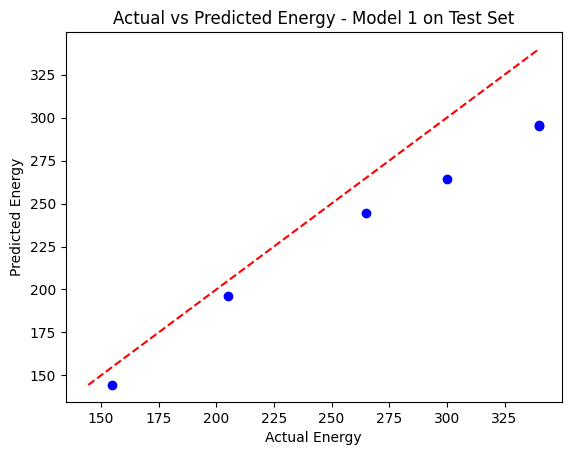

In [13]:
# Determine the min and max of both actual and predicted energies
actual_min = min(test_results_df['Actual Energy'])
actual_max = max(test_results_df['Actual Energy'])
predicted_min = min(test_results_df['Model 1 Predicted Energy'])
predicted_max = max(test_results_df['Model 1 Predicted Energy'])

# Use the bounds of both actual and predicted energies for the line of perfect prediction
plt.plot([min(actual_min, predicted_min), max(actual_max, predicted_max)],
         [min(actual_min, predicted_min), max(actual_max, predicted_max)],
         color='red', linestyle='--')

# Plot actual vs predicted values
plt.scatter(test_results_df['Actual Energy'], test_results_df['Model 1 Predicted Energy'], color='blue')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title('Actual vs Predicted Energy - Model 1 on Test Set')
plt.show()

## Bigger Model

In [14]:
class MultiRegressionModel2(nn.Module):
	def __init__(self):
		super(MultiRegressionModel2, self).__init__()
		# define fully connected layers
		self.fc1 = nn.Linear(4, 10) # 4 input features -> 10 neurons
		self.fc2 = nn.Linear(10, 10)
		self.fc3 = nn.Linear(10, 1) # 10 neurons -> 1 output neuron (energy)
	
	def forward(self, x):
		x = self.fc1(x)
		x = self.fc2(x)
		x = self.fc3(x)
		return x
model = MultiRegressionModel2()

### Train model

In [15]:
train_model(model)

Epoch [100/1000], Loss: 147.3004
Epoch [200/1000], Loss: 53.2372
Epoch [300/1000], Loss: 51.0385
Epoch [400/1000], Loss: 49.4187
Epoch [500/1000], Loss: 47.7774
Epoch [600/1000], Loss: 46.1304
Epoch [700/1000], Loss: 44.5265
Epoch [800/1000], Loss: 43.0053
Epoch [900/1000], Loss: 41.5971
Epoch [1000/1000], Loss: 40.3236


### Evaluate performance on test set

In [16]:
# Predicting using the trained model on the entire dataset (X)
model.eval()
with torch.no_grad():
    all_predictions = model(torch.tensor(X, dtype=torch.float32)).numpy()

# Append predictions to the dataframe as a new column
nutrients_dataframe['Model 2 Predicted Energy'] = all_predictions

# Print the updated dataframe with predictions
nutrients_dataframe.head()

,Name,Energy,Protein,Fat,Calcium,Iron,Model 1 Predicted Energy,Model 2 Predicted Energy
0,Braised beef,340,20,28,9,2.6,295.060181,341.828308
1,Hamburger,245,21,17,9,2.7,230.940277,247.287491
2,Roast beef,420,15,39,7,2.0,336.671844,420.917267
3,Beefsteak,375,19,32,9,2.6,315.351654,373.713165
4,Canned beef,180,22,10,17,3.7,196.230301,188.248871


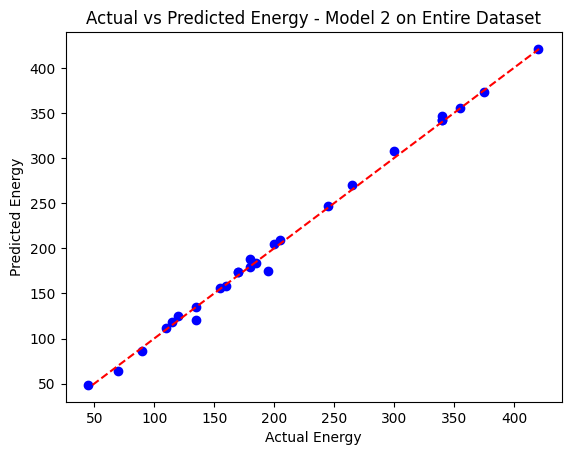

In [17]:
# Determine the min and max of both actual and predicted energies
predicted_min = min(nutrients_dataframe['Model 2 Predicted Energy'])
predicted_max = max(nutrients_dataframe['Model 2 Predicted Energy'])

# Use the bounds of both actual and predicted energies for the line of perfect prediction
plt.plot([min(actual_min, predicted_min), max(actual_max, predicted_max)],
         [min(actual_min, predicted_min), max(actual_max, predicted_max)],
         color='red', linestyle='--')

# Plot actual vs predicted values
plt.scatter(nutrients_dataframe['Energy'], nutrients_dataframe['Model 2 Predicted Energy'], color='blue')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title('Actual vs Predicted Energy - Model 2 on Entire Dataset')
plt.show()

### Evaluate Model 2 on Test Set

In [18]:
# Make predictions on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Convert predictions to numpy for easier manipulation
test_predictions = test_predictions.numpy()
test_results_df['Model 2 Predicted Energy'] = test_predictions.flatten()
test_results_df

,Protein,Fat,Calcium,Iron,Actual Energy,Model 1 Predicted Energy,Model 2 Predicted Energy
0,20.0,20.0,9.0,2.6,265.0,244.409134,270.255829
1,18.0,14.0,7.0,2.5,205.0,195.945724,208.807129
2,18.0,25.0,9.0,2.3,300.0,264.524139,307.276031
3,16.0,9.0,157.0,1.8,155.0,144.462845,156.228348
4,20.0,28.0,9.0,2.6,340.0,295.060150,341.828308
5,19.0,29.0,9.0,2.5,340.0,295.866241,346.903534


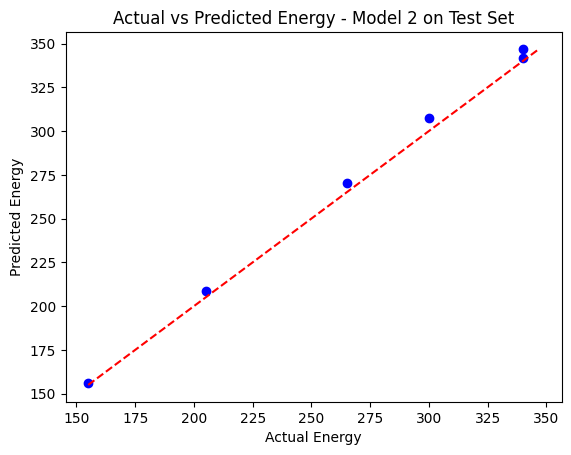

In [19]:
# Determine the min and max of both actual and predicted energies
predicted_min = min(test_results_df['Model 2 Predicted Energy'])
predicted_max = max(test_results_df['Model 2 Predicted Energy'])

# Use the bounds of both actual and predicted energies for the line of perfect prediction
plt.plot([min(actual_min, predicted_min), max(actual_max, predicted_max)],
         [min(actual_min, predicted_min), max(actual_max, predicted_max)],
         color='red', linestyle='--')

# Plot actual vs predicted values
plt.scatter(test_results_df['Actual Energy'], test_results_df['Model 2 Predicted Energy'], color='blue')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title('Actual vs Predicted Energy - Model 2 on Test Set')
plt.show()